# Data Analysis Project: E-Commerce Public Dataset
- Nama: Naufal Hadi Darmawan
- Email: hadinaufal06@gmail.com
- ID Dicoding: naufalhd12

## Menentukan Pertanyaan Bisnis
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Dari kota dan *state* mana saja pelanggan berasal?
- Kategori produk apa yang paling banyak dan paling sedikit terjual?
- Kategori produk apa yang memiliki rata - rata review tertinggi dan terendah?
- Kapan terakhir seorang pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan transaksi?
- Seberapa besar total revenue yang dihasilkan oleh seorang pelanggan?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### customers_df

In [3]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### order_items_df

In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### order_payments_df

In [5]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### order_reviews_df

In [6]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### orders_df

In [7]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### products_df

In [8]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### product_category_name_translation_df

In [9]:
product_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### customers_df

In [10]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [12]:
print("Jumlah duplikasi:", customers_df.duplicated().sum())

Jumlah duplikasi: 0


#### order_items_df

In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
print("Jumlah duplikasi:",order_items_df.duplicated().sum())

Jumlah duplikasi: 0


#### order_payments_df

In [16]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [17]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [18]:
print("Jumlah duplikat:", order_payments_df.duplicated().sum())

Jumlah duplikat: 0


#### order_reviews_df

In [19]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [21]:
print("Jumlah duplikat:", order_reviews_df.duplicated().sum())

Jumlah duplikat: 0


#### orders_df

In [22]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [24]:
print("Jumlah duplikat:", orders_df.duplicated().sum())

Jumlah duplikat: 0


#### products_df

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [27]:
print("Jumlah duplikat:", products_df.duplicated().sum())

Jumlah duplikat: 0


#### product_name_translation_df

In [28]:
product_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [29]:
product_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [30]:
print("Jumlah duplikat:", product_name_translation_df.duplicated().sum())

Jumlah duplikat: 0


### Cleaning Data

#### Mengatasi missing values pada order_reviews_df

In [31]:
order_reviews_df = order_reviews_df.drop(columns=["review_comment_title", "review_comment_message"])
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Mengganti tipe data menjadi datetime pada orders_reviews_df

In [32]:
order_reviews_df[["review_creation_date", "review_answer_timestamp"]] = order_reviews_df[["review_creation_date", "review_answer_timestamp"]].apply(pd.to_datetime)
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


#### Mengganti tipe data menjadi datetime pada orders_df

In [33]:
orders_df[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]] = orders_df[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]].apply(pd.to_datetime)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Drop baris yang mengandung missing values pada orders_df

In [34]:
orders_df.dropna(subset=["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"], inplace=True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Drop baris yang mengandung missing values pada orders_df

In [35]:
products_df.dropna(inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Dari kota dan *state* mana saja pelanggan berasal?
- Kategori produk apa yang paling banyak dan paling sedikit terjual?
- Kategori produk apa yang memiliki rata - rata review tertinggi dan terendah?
- Kapan terakhir seorang pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan transaksi?
- Seberapa besar total revenue yang dihasilkan oleh seorang pelanggan?

### customers_df

In [36]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [37]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [38]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### orders_df

In [39]:
orders_merge_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_merge_df = pd.merge(
    left=orders_merge_df,
    right=order_payments_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_merge_df = pd.merge(
    left=orders_merge_df,
    right=order_reviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_merge_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
count,114842,114842,114842,114842,114842,114842,114842,114842,114842.000000,114842,...,114842.000000,114842.000000,114842.000000,114842,114842.000000,114842.000000,114842,114842.000000,114842,114842
unique,95814,95814,2,NaN,NaN,NaN,NaN,NaN,NaN,32066,...,NaN,NaN,NaN,4,NaN,NaN,95629,NaN,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,NaN,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,NaN,NaN
freq,63,63,114835,NaN,NaN,NaN,NaN,NaN,NaN,526,...,NaN,NaN,NaN,84731,NaN,NaN,63,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 14:01:07.242567680,2018-01-01 00:26:59.919785472,2018-01-03 20:42:01.890040320,2018-01-13 00:41:01.711142400,2018-01-24 09:57:53.732606208,1.194615,NaN,...,119.770503,19.974653,1.091578,NaN,2.938089,171.257124,NaN,4.080397,2018-01-12 20:00:17.460510976,2018-01-15 23:39:21.452769792
min,NaN,NaN,NaN,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,1.000000,NaN,...,0.850000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,1.000000,2016-10-15 00:00:00,2016-10-16 03:20:17
25%,NaN,NaN,NaN,2017-09-12 19:51:49,2017-09-13 08:45:14,2017-09-15 14:55:01.750000128,2017-09-23 12:58:11,2017-10-04 00:00:00,1.000000,NaN,...,39.900000,13.072500,1.000000,NaN,1.000000,60.720000,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 14:06:30.249999872
50%,NaN,NaN,NaN,2018-01-19 04:24:00,2018-01-19 14:36:48.500000,2018-01-23 19:32:03,2018-02-01 16:53:26,2018-02-15 00:00:00,1.000000,NaN,...,74.900000,16.280000,1.000000,NaN,2.000000,108.000000,NaN,5.000000,2018-02-02 00:00:00,2018-02-04 20:17:14.500000
75%,NaN,NaN,NaN,2018-05-04 14:21:11,2018-05-04 21:27:43.500000,2018-05-08 08:40:00,2018-05-15 14:12:41,2018-05-25 00:00:00,1.000000,NaN,...,132.900000,21.150000,1.000000,NaN,4.000000,188.690000,NaN,5.000000,2018-05-15 00:00:00,2018-05-20 10:16:47.249999872
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,...,6735.000000,409.680000,26.000000,NaN,24.000000,13664.080000,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


### products_df

In [40]:
products_merge_df = pd.merge(
    left=products_df,
    right=product_name_translation_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_merge_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [41]:
products_merge_df.drop(columns=["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"], inplace=True)

In [42]:
products_merge_df.describe(include="all")

,product_id,product_category_name,product_category_name_english
count,32327,32327,32327
unique,32327,71,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


### Merge orders dengan products

In [43]:
orders_products_df = pd.merge(
    left=orders_merge_df,
    right=products_merge_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
orders_products_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english
count,113193,113193,113193,113193,113193,113193,113193,113193,113193.000000,113193,...,113193.000000,113193,113193.000000,113193.000000,113193,113193.000000,113193,113193,113193,113193
unique,94471,94471,2,NaN,NaN,NaN,NaN,NaN,NaN,31474,...,NaN,4,NaN,NaN,94295,NaN,NaN,NaN,71,71
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,NaN,NaN,cama_mesa_banho,bed_bath_table
freq,63,63,113186,NaN,NaN,NaN,NaN,NaN,NaN,526,...,NaN,83534,NaN,NaN,63,NaN,NaN,NaN,11684,11684
mean,NaN,NaN,NaN,2018-01-01 07:46:22.707817472,2018-01-01 18:12:25.359050752,2018-01-04 14:19:54.360985088,2018-01-13 18:22:26.739418624,2018-01-25 03:50:01.955951360,1.195065,NaN,...,1.090818,NaN,2.943680,171.557922,NaN,4.082505,2018-01-13 13:43:38.843921408,2018-01-16 17:26:39.174852096,NaN,NaN
min,NaN,NaN,NaN,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,1.000000,NaN,...,1.000000,NaN,0.000000,0.000000,NaN,1.000000,2016-10-15 00:00:00,2016-10-16 03:20:17,NaN,NaN
25%,NaN,NaN,NaN,2017-09-13 14:12:25,2017-09-13 22:05:44,2017-09-15 20:07:55,2017-09-25 18:34:40,2017-10-04 00:00:00,1.000000,NaN,...,1.000000,NaN,1.000000,60.850000,NaN,4.000000,2017-09-26 00:00:00,2017-09-28 01:45:41,NaN,NaN
50%,NaN,NaN,NaN,2018-01-20 09:22:45,2018-01-20 16:00:33,2018-01-24 00:23:35,2018-02-02 02:15:19,2018-02-16 00:00:00,1.000000,NaN,...,1.000000,NaN,2.000000,107.960000,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 18:13:14,NaN,NaN
75%,NaN,NaN,NaN,2018-05-05 13:57:15,2018-05-05 19:50:47,2018-05-08 14:07:00,2018-05-15 20:02:55,2018-05-28 00:00:00,1.000000,NaN,...,1.000000,NaN,4.000000,189.150000,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 14:57:58,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,...,26.000000,NaN,24.000000,13664.080000,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,NaN,NaN


In [44]:
orders_products_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "price": ["min", "max"],
    "payment_value": "sum"
}).sort_values(by=("payment_value", "sum"), ascending=False)

order_id order_item_id   price           \
                               nunique           sum     min      max   
product_category_name_english                                           
bed_bath_table                    9176         14429    6.99  1999.98   
health_beauty                     8602         11146    1.20  3124.00   
computers_accessories             6498         10002    3.90  3699.99   
furniture_decor                   6256         11785    4.90  1899.00   
watches_gifts                     5452          6631    8.99  3999.90   
...                                ...           ...     ...      ...   
flowers                             28            34   15.60    65.90   
home_comfort_2                      23            34   12.90   219.99   
cds_dvds_musicals                   12            16   45.00    65.00   
fashion_childrens_clothes            7             7   39.99   110.00   
security_and_services                2             2  100.00   183.29   

                              payment_value  
                                        sum  
product_category_name_english                
bed_bath_table                   1706872.26  
health_beauty                    1612019.96  
computers_accessories            1557592.86  
furniture_decor                  1391435.19  
watches_gifts                    1380171.71  
...                                     ...  
flowers                             1922.77  
home_comfort_2                      1458.54  
cds_dvds_musicals                   1199.43  
fashion_childrens_clothes            718.98  
security_and_services                324.51  

[71 rows x 5 columns]

In [45]:
orders_products_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "review_score": "mean"
}).sort_values(by="review_score", ascending=False)

,product_id,review_score
product_category_name_english,,
fashion_childrens_clothes,4,5.000000
cds_dvds_musicals,1,4.642857
books_imported,30,4.525424
books_general_interest,207,4.501838
small_appliances_home_oven_and_coffee,30,4.453333
...,...,...
fashion_male_clothing,88,3.649635
home_comfort_2,5,3.642857
office_furniture,299,3.553204


### Merge semua dataset menjadi all_df

In [46]:
all_df = pd.merge(
    left=customers_df,
    right=orders_products_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
all_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:40,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30,2018-02-10 22:43:29,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,2018-06-15,2018-06-15 12:10:59,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29,2018-04-02 18:36:47,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10,2018-08-17 01:59:52,casa_conforto,home_confort


In [47]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "order_item_id": "sum",
    "payment_value": "sum"
})

order_item_id  payment_value
customer_state product_category_name_english                              
AC             auto                                       5         661.91
               baby                                       3         871.97
               bed_bath_table                             6        1377.07
               books_general_interest                     2         757.51
               christmas_supplies                         1         130.85
...                                                     ...            ...
TO             sports_leisure                            28        6961.25
               stationery                                 3         350.60
               telephony                                 22        2015.52
               toys                                      14        2469.97
               watches_gifts                             33        6719.31

[1346 rows x 2 columns]

## Visualization & Explanatory Analysis

### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [48]:
monthly_revenue_df = all_df.resample(rule="M", on="order_approved_at").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

monthly_revenue_df.index = monthly_revenue_df.index.strftime("%Y-%m")
monthly_revenue_df = monthly_revenue_df.reset_index()

monthly_revenue_df_2018 = monthly_revenue_df[monthly_revenue_df["order_approved_at"].str.startswith('2018')]
monthly_revenue_df_2018.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_revenue_df_2018.head(8)

C:\Users\hadin\AppData\Local\Temp\ipykernel_17116\2965481343.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_revenue_df_2018.rename(columns={


,order_approved_at,order_count,revenue
15,2018-01,6769,1319831.16
16,2018-02,6381,1249132.65
17,2018-03,6909,1421371.16
18,2018-04,6532,1426186.12
19,2018-05,6872,1498350.16
20,2018-06,6050,1285512.82
21,2018-07,5963,1260622.64
22,2018-08,6451,1237558.47


C:\Users\hadin\AppData\Local\Temp\ipykernel_17116\3880942049.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_revenue_df_2018.rename(columns={
C:\Users\hadin\AppData\Local\Temp\ipykernel_17116\3880942049.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_revenue_df_2018['order_approved_at'] = pd.to_datetime(monthly_revenue_df_2018['order_approved_at'])


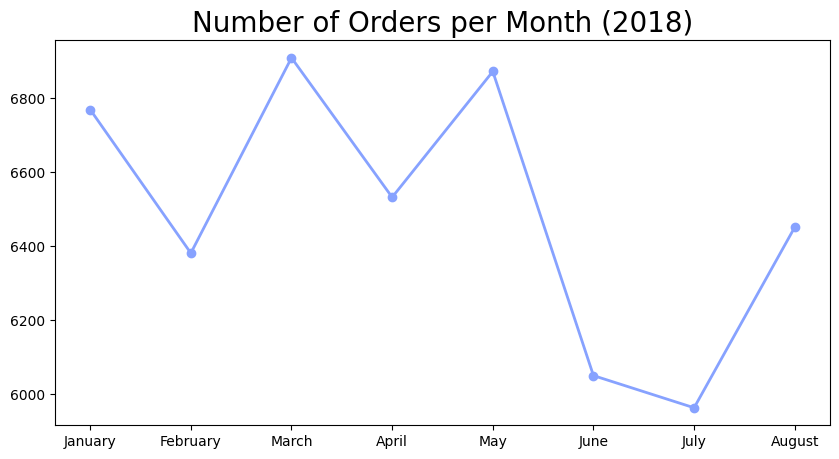

In [49]:
# Mengambil data bulanan dan mengelompokkan berdasarkan order_approved_at
monthly_revenue_df = all_df.resample(rule="M", on="order_approved_at").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

# Mengubah format index menjadi string dengan format "YYYY-MM"
monthly_revenue_df.index = monthly_revenue_df.index.strftime("%Y-%m")
monthly_revenue_df = monthly_revenue_df.reset_index()

# Menampilkan data hanya untuk tahun 2018
monthly_revenue_df_2018 = monthly_revenue_df[monthly_revenue_df["order_approved_at"].str.startswith('2018')]

# Mengganti nama kolom untuk kejelasan
monthly_revenue_df_2018.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"  # Gantilah total_price dengan payment_value
}, inplace=True)

# Pastikan index dalam format datetime
monthly_revenue_df_2018['order_approved_at'] = pd.to_datetime(monthly_revenue_df_2018['order_approved_at'])

# Mengubah index menjadi nama bulan
monthly_revenue_df_2018.set_index('order_approved_at', inplace=True)
monthly_revenue_df_2018.index = monthly_revenue_df_2018.index.strftime("%B")

# Reset index jika perlu untuk menampilkan bulan dalam kolom
monthly_revenue_df_2018.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue_df_2018["order_approved_at"], monthly_revenue_df_2018["order_count"], marker="o", linewidth=2, color="#87A2FF")
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan linechart di atas, order terbanyak terjadi di bulan **Maret** dan bulan **Juli** menjadi yang paling sedikit terjadi order. Terdapat juga penurunan yang signifikan dari bulan Mei hingga mencapai titik terendah di bulan Juli

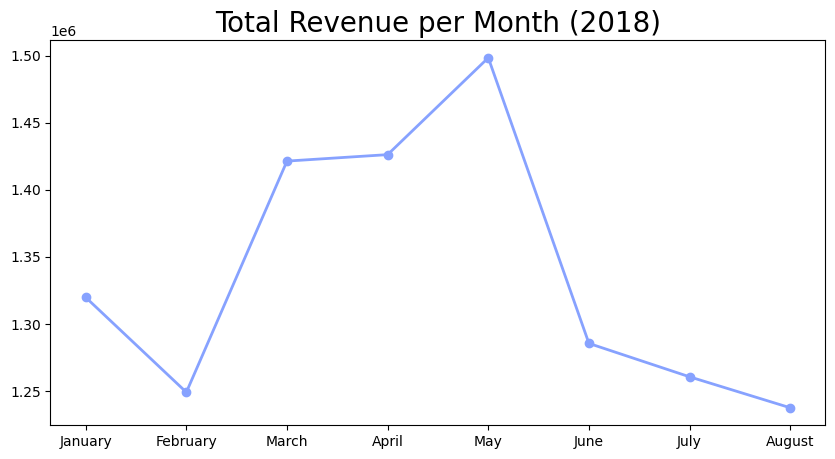

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue_df_2018["order_approved_at"], monthly_revenue_df_2018["revenue"], marker="o", linewidth=2, color="#87A2FF")
plt.title("Total Revenue per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Pada chart di atas revenue terbesar ada pada bulan Mei hal ini cukup berbeda dengan chart sebelumnya yang mana order terbanyaknya ada pada bulan Maret. Bulan Agustus menjadi penyumbang revenue terkecil, ini cukup mengejutkan karena total order number pada chart sebelumnya yang memiliki selisih cukup besar dengan bulan Juli (lowest order numbers) yaitu 488 orders.

### Dari kota dan *state* mana saja pelanggan berasal?

C:\Users\hadin\AppData\Local\Temp\ipykernel_17116\113837830.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


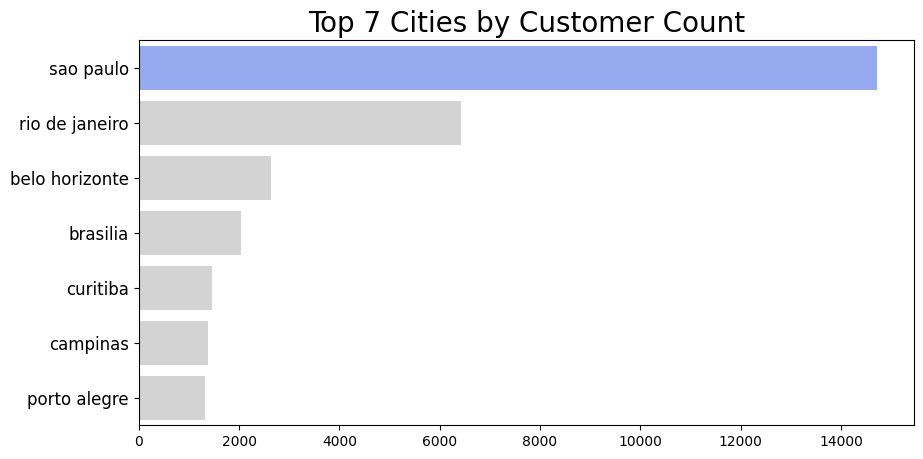

In [51]:
by_city_df = all_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
by_city_df.rename("customer_count", inplace=True)
top_7_cities = by_city_df.head(7)
top_7_cities_df = top_7_cities.reset_index()
# Mengubah nama kolom agar sesuai dengan pengaturan barplot
top_7_cities_df.rename(columns={"customer_city": "city", "customer_count": "customer_count"}, inplace=True)

plt.figure(figsize=(10, 5))
colors = ["#87A2FF", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="city",
    data=top_7_cities_df,
    palette=colors
)
plt.title("Top 7 Cities by Customer Count", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="y", labelsize=12)
plt.show()


Bisa dilihat dalam chart di atas terdapat 7 kota dengan pengguna terbanyak. Kota Sao Paulo menjadi mayoritas dengan total pengguna hampir 16000. 

C:\Users\hadin\AppData\Local\Temp\ipykernel_17116\290140100.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


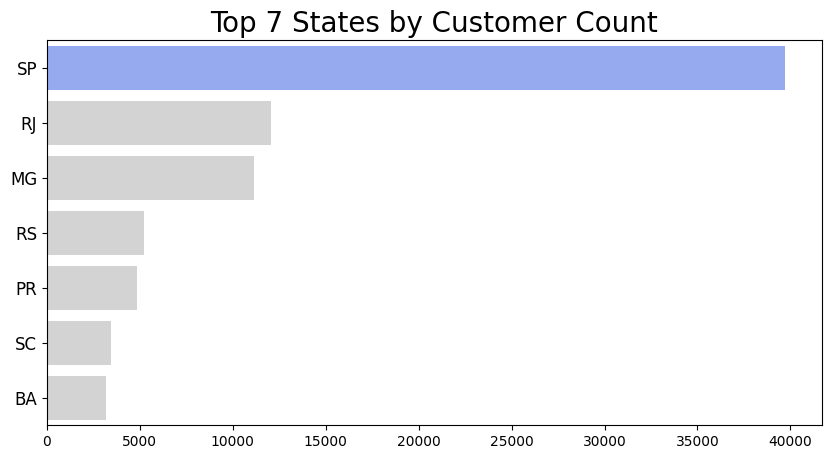

In [52]:
by_state_df = all_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
by_state_df.rename("customer_count", inplace=True)
top_7_states = by_state_df.head(7)
top_7_states_df = top_7_states.reset_index()
# Mengubah nama kolom agar sesuai dengan pengaturan barplot
top_7_states_df.rename(columns={"customer_state": "state", "customer_count": "customer_count"}, inplace=True)

plt.figure(figsize=(10, 5))
colors = ["#87A2FF", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=top_7_states_df,
    palette=colors
)
plt.title("Top 7 States by Customer Count", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="y", labelsize=12)
plt.show()


Dalam chart di atas juga State SP hingga lebih dari 40000 pengguna hal ini selaras dengan chart sebelumnya.

### Kategori produk apa yang paling banyak dan paling sedikit terjual?

In [53]:
products_orders_df = all_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
}).sort_values(by="order_item_id", ascending=False)
products_orders_df = products_orders_df.rename(
    columns={"order_item_id": "quantity"}
)
products_orders_df.head(5)

,quantity
product_category_name_english,
bed_bath_table,14429
furniture_decor,11785
health_beauty,11146
sports_leisure,10041
computers_accessories,10002


C:\Users\hadin\AppData\Local\Temp\ipykernel_17116\2517503234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category_name_english", data=products_orders_df.head(5), palette=colors, ax=ax[0])
C:\Users\hadin\AppData\Local\Temp\ipykernel_17116\2517503234.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category_name_english", data=products_orders_df.sort_values(by="quantity", ascending=True).head(5), palette=colors2, ax=ax[1])


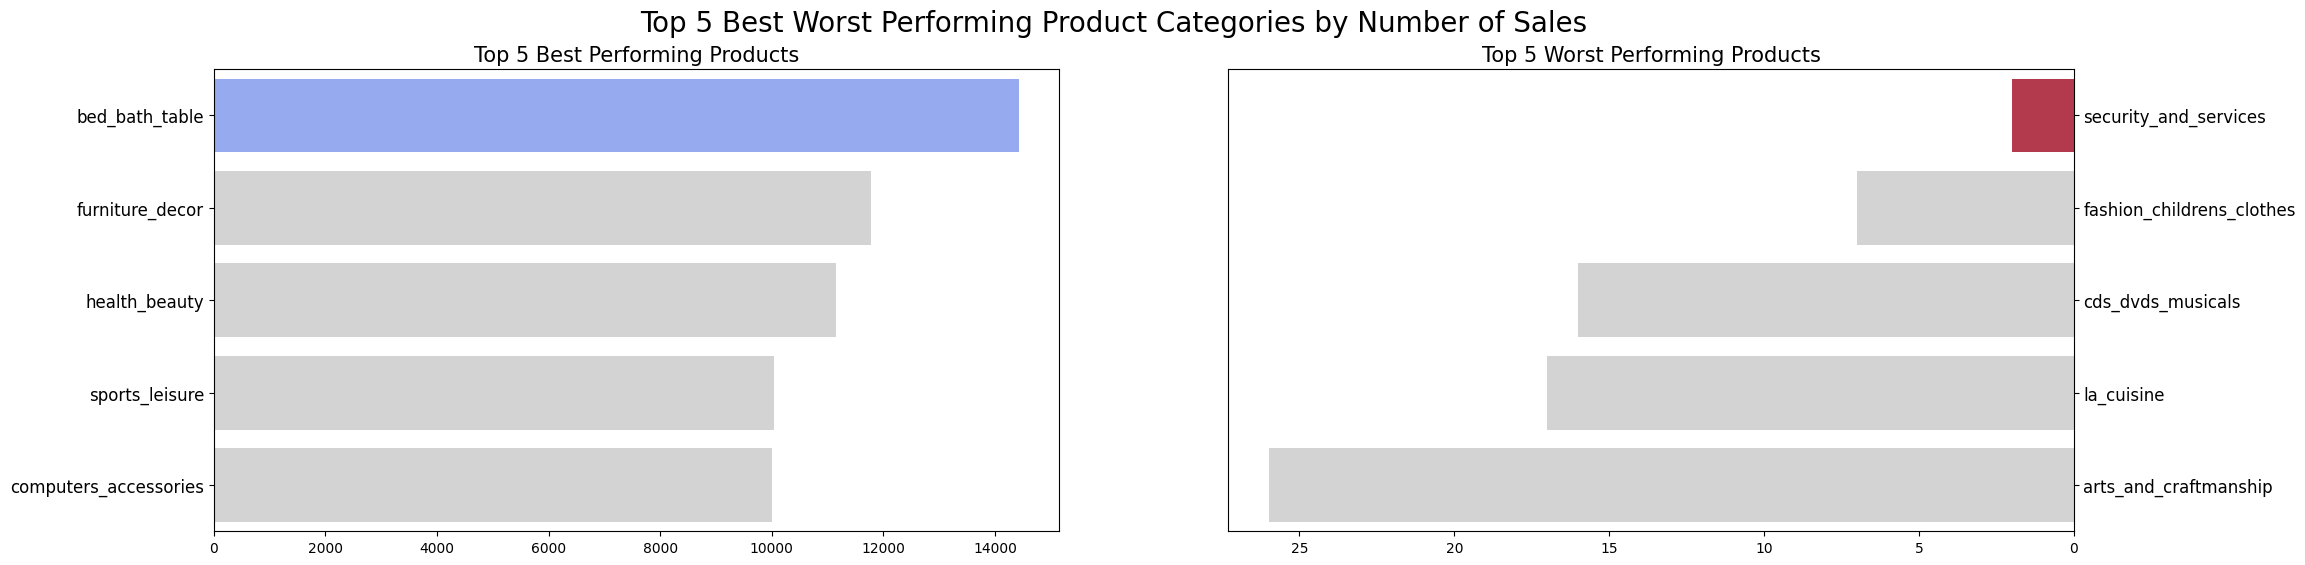

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
colors = ["#87A2FF", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors2 = ["#C7253E", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="product_category_name_english", data=products_orders_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Best Performing Products", loc="center", fontsize=15)
ax[0].tick_params(axis="y", labelsize=12)

sns.barplot(x="quantity", y="product_category_name_english", data=products_orders_df.sort_values(by="quantity", ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Top 5 Worst Performing Products", loc="center", fontsize=15)
ax[1].tick_params(axis="y", labelsize=12)

plt.suptitle("Top 5 Best Worst Performing Product Categories by Number of Sales", fontsize="20")
plt.show()

Berdasarkan chart tersebut kategori produk bed_bath_table menjadi yang paling laris, sedangkan kategori produk security_and_service menjadi kategori yang paling tidak laku.

### Kategori produk apa yang memiliki rata - rata review tertinggi dan terendah?

In [55]:
product_reviews_df = all_df.groupby(by="product_category_name_english").agg({
    "review_score": "mean"
}).sort_values(by="review_score", ascending=False)
product_reviews_df.head()

,review_score
product_category_name_english,
fashion_childrens_clothes,5.000000
cds_dvds_musicals,4.642857
books_imported,4.525424
books_general_interest,4.501838
small_appliances_home_oven_and_coffee,4.453333


C:\Users\hadin\AppData\Local\Temp\ipykernel_17116\3070756551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=product_reviews_df.head(5), palette=colors, ax=ax[0])
C:\Users\hadin\AppData\Local\Temp\ipykernel_17116\3070756551.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=product_reviews_df.sort_values(by="review_score", ascending=True).head(5), palette=colors2, ax=ax[1])


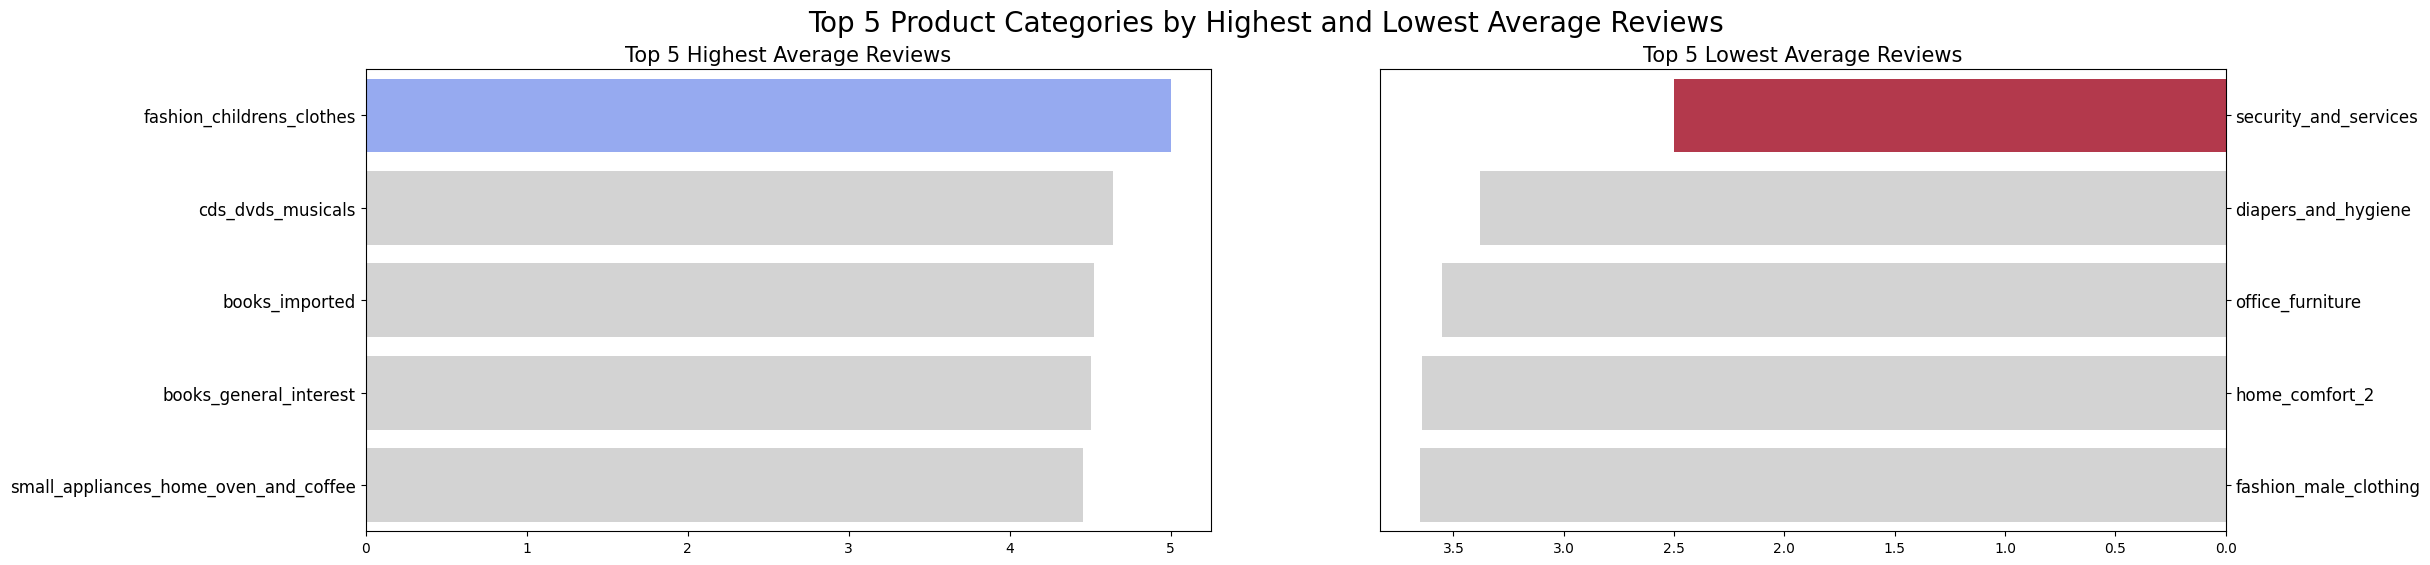

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
colors = ["#87A2FF", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors2 = ["#C7253E", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name_english", data=product_reviews_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Highest Average Reviews", loc="center", fontsize=15)
ax[0].tick_params(axis="y", labelsize=12)

sns.barplot(x="review_score", y="product_category_name_english", data=product_reviews_df.sort_values(by="review_score", ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Top 5 Lowest Average Reviews", loc="center", fontsize=15)
ax[1].tick_params(axis="y", labelsize=12)

plt.suptitle("Top 5 Product Categories by Highest and Lowest Average Reviews", fontsize="20")
plt.show()

Pada Chart di atas, fashion_childrens_clothes menjadi kategori produk dengan rata-rata review tertingi bahkan mencapai nilai sempurna yaitu **5**. Di sisi lain security_and_services menjadi kategori produk dengan rata-rata review terendah dengan **2.5**.

## Analisis lanjutan

### RFM Analysis
Rilakukan untuk menjawab 3 pertanyaan Terakhir:
- Kapan terakhir seorang pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan transaksi?
- Seberapa besar total revenue yang dihasilkan oleh seorang pelanggan?

In [57]:
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:40,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30,2018-02-10 22:43:29,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,2018-06-15,2018-06-15 12:10:59,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29,2018-04-02 18:36:47,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10,2018-08-17 01:59:52,casa_conforto,home_confort


In [58]:
# Tentukan tanggal referensi untuk menghitung Recency (misalnya, tanggal analisis)
reference_date = all_df['order_approved_at'].max()

# Grup data berdasarkan 'customer_id' dan hitung Recency, Frequency, Monetary
rfm = all_df.groupby('customer_id').agg({
    'order_approved_at': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                   # Frequency (jumlah unik order)
    'payment_value': 'sum'                                     # Monetary (total pendapatan)
}).reset_index()

# Ubah nama kolom untuk memudahkan interpretasi
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Tampilkan hasil RFM
print(rfm.head())

                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      287          1    114.74
1  000161a058600d5901f007fab4c27140      409          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      547          1    195.42
3  0002414f95344307404f0ace7a26f1d5      377          1    179.35
4  000379cdec625522490c315e70c7a9fb      147          1    107.01


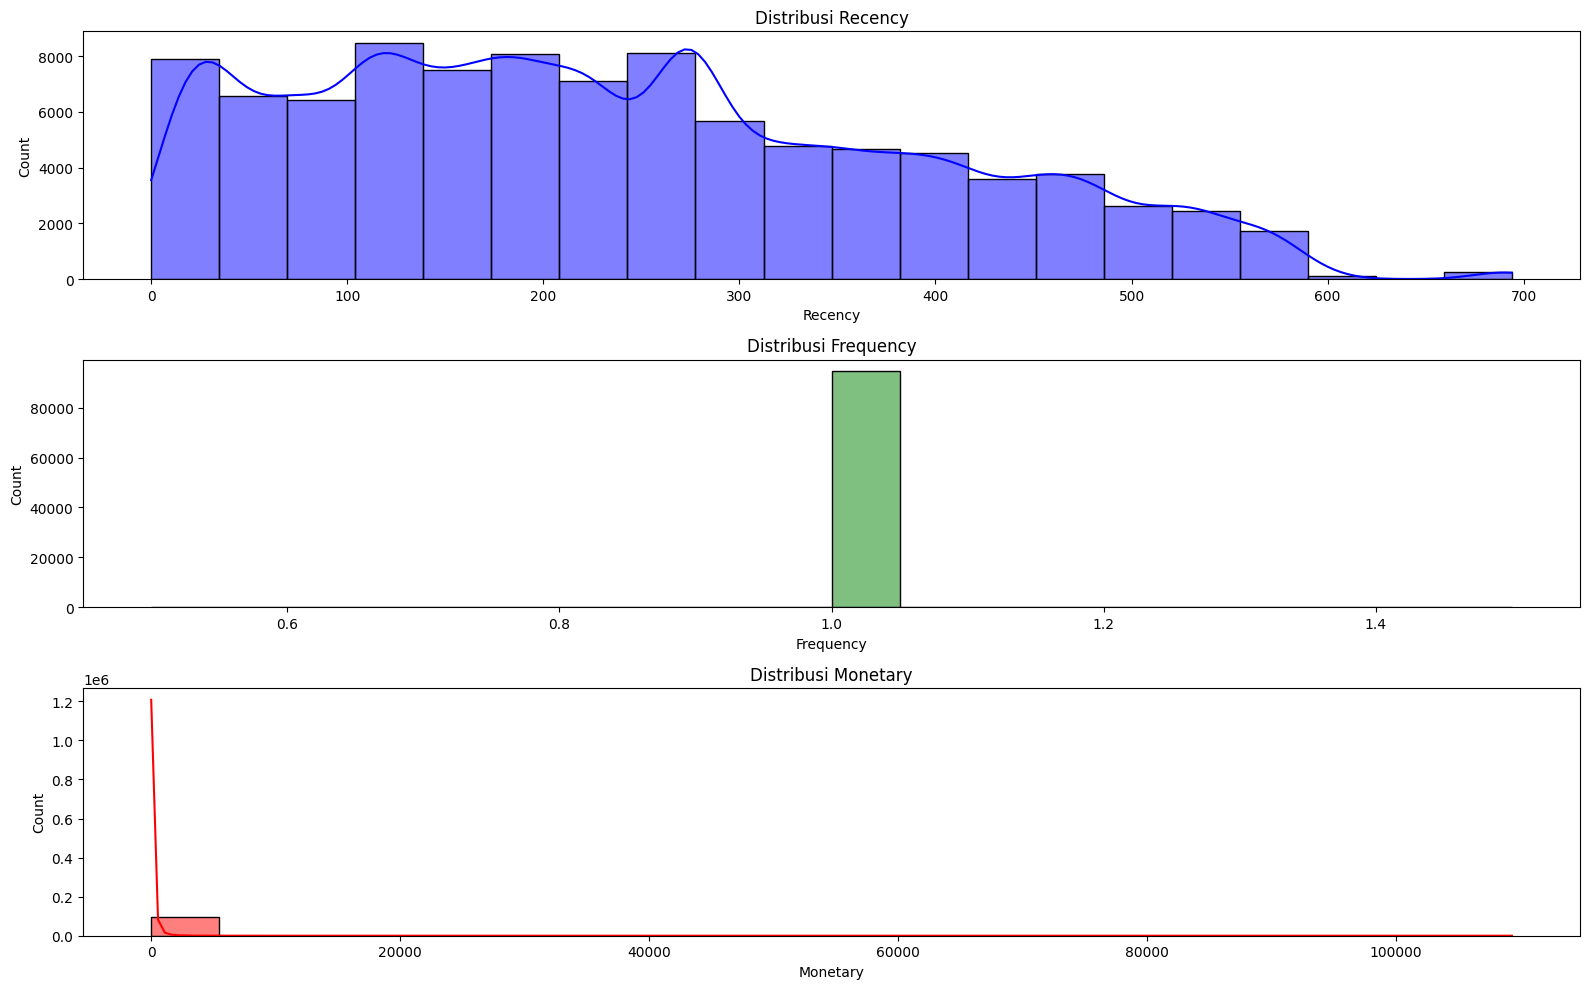

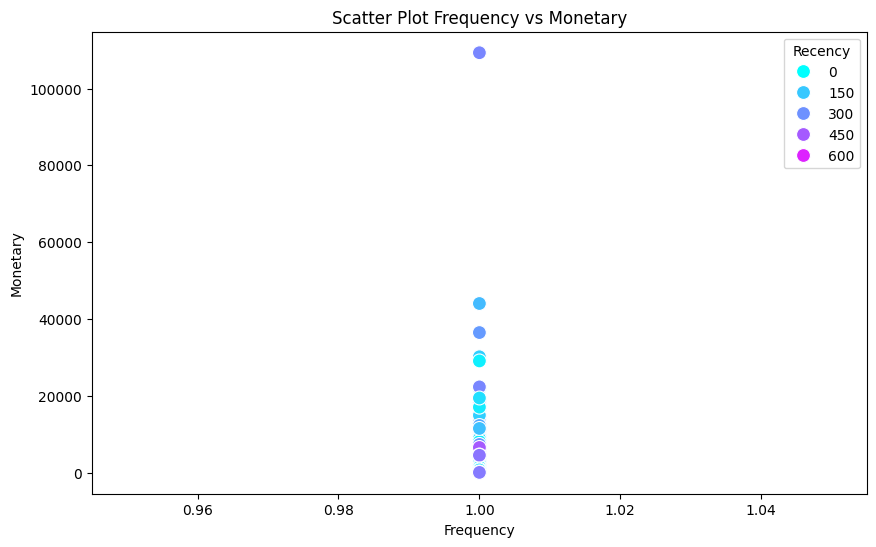

In [59]:
# Set ukuran plot agar lebih besar
plt.figure(figsize=(16, 10))

# Plot distribusi Recency
plt.subplot(3, 1, 1)
sns.histplot(rfm['Recency'], kde=True, bins=20, color='blue')
plt.title('Distribusi Recency')

# Plot distribusi Frequency
plt.subplot(3, 1, 2)
sns.histplot(rfm['Frequency'], kde=True, bins=20, color='green')
plt.title('Distribusi Frequency')

# Plot distribusi Monetary
plt.subplot(3, 1, 3)
sns.histplot(rfm['Monetary'], kde=True, bins=20, color='red')
plt.title('Distribusi Monetary')

# Tampilkan grafik
plt.tight_layout()
plt.show()

# Scatter plot untuk melihat hubungan antara Frequency dan Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Recency', palette='cool', s=100)
plt.title('Scatter Plot Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

#### Distribusi Recency:
- Histogram Recency menunjukkan bahwa banyak pelanggan yang melakukan transaksi terakhir mereka dalam 100 hari terakhir. Ini menunjukkan bahwa banyak pelanggan yang relatif baru melakukan pembelian.
- Seiring bertambahnya hari, jumlah pelanggan yang melakukan transaksi semakin berkurang, yang menunjukkan bahwa semakin lama waktu sejak transaksi terakhir, semakin kecil kemungkinan pelanggan aktif.
#### Distribusi Frequency:
Distribusi Frequency menunjukkan bahwa mayoritas pelanggan hanya melakukan 1 transaksi. Ini berarti kebanyakan pelanggan dalam dataset hanya bertransaksi satu kali. Kurangnya pengulangan transaksi menunjukkan rendahnya loyalitas pelanggan atau pembelian berulang.
####  Distribusi Monetary:
- Distribusi Monetary memperlihatkan bahwa sebagian besar pelanggan menghasilkan pendapatan yang relatif kecil. Ada sedikit pelanggan yang menghasilkan jumlah pendapatan yang sangat tinggi, tetapi mereka adalah outlier dibandingkan dengan populasi pelanggan secara keseluruhan.
- Ini mengindikasikan bahwa sebagian besar pendapatan berasal dari beberapa pelanggan besar, sementara sebagian besar pelanggan menghasilkan pendapatan kecil per transaksi.
#### Scatter Plot (Frequency vs Monetary):
- Scatter plot Frequency vs Monetary menunjukkan bahwa pelanggan yang bertransaksi lebih dari satu kali hampir tidak ada. Sebagian besar pelanggan hanya bertransaksi satu kali, tetapi terdapat satu pelanggan yang menghasilkan pendapatan luar biasa besar.
- Pelanggan dengan recency yang lebih rendah (transaksi baru-baru ini) cenderung memiliki monetary yang lebih kecil, sementara pelanggan dengan recency yang lebih tinggi memiliki monetary yang lebih beragam, dari sangat kecil hingga sangat besar.

## Additional: Product Recommendation Model

In [60]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate

# Step 2: Load the dataset
# Assuming the dataset is saved as 'ecommerce_data.csv'
df = all_df

# Step 3: Inspect the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113193 entries, 0 to 113192
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   customer_zip_code_prefix       113193 non-null  int64         
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:40,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30,2018-02-10 22:43:29,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,2018-06-15,2018-06-15 12:10:59,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29,2018-04-02 18:36:47,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10,2018-08-17 01:59:52,casa_conforto,home_confort


In [61]:
# Step 4: Data Preprocessing
# Convert timestamp columns to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Step 5: Handling missing values
# Drop rows with missing review scores (since they are important for recommendations)
df = df.dropna(subset=['review_score'])

# Step 6: Feature engineering - Create user-item interaction matrix
user_item_df = df.groupby(['customer_unique_id', 'product_id'])['review_score'].mean().reset_index()

# Step 7: Prepare data for Surprise library
# Define reader to specify rating scale
reader = Reader(rating_scale=(1, 5))

# Load data into Surprise format
data = Dataset.load_from_df(user_item_df[['customer_unique_id', 'product_id', 'review_score']], reader)

# Step 8: Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Step 9: Initialize and train the model
model = SVD()
model.fit(trainset)

# Step 10: Evaluate the model using cross-validation
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Step 11: Predict on test set and evaluate RMSE
predictions = model.test(testset)

# Function to calculate RMSE
def rmse(predictions):
    return np.sqrt(np.mean([ (true_r - est)**2 for _, _, true_r, est, _ in predictions]))

rmse_val = rmse(predictions)
print(f"RMSE on test set: {rmse_val}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2908  1.2829  1.2825  1.2728  1.2800  1.2818  0.0058  
MAE (testset)     1.0112  1.0066  1.0034  0.9981  1.0014  1.0041  0.0045  
Fit time          1.25    1.57    1.41    1.31    1.23    1.35    0.13    
Test time         0.09    0.09    0.08    0.08    0.09    0.08    0.01    
RMSE on test set: 0.9583475066725848


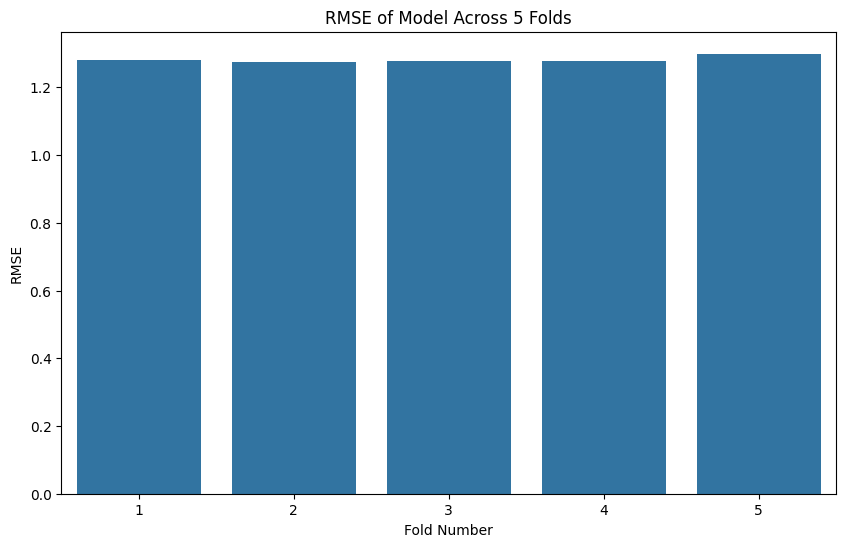

Top 5 product recommendations for customer:


,Product ID,Estimated Rating
0,e2e426d1332240070b0a836a854d057b,4.982901
1,57e089e3103f5cda6a4ce23b77399bdb,4.936959
2,1d7db62a21ffb4f220d3e8a05fa77e02,4.908135
3,73326828aa5efe1ba096223de496f596,4.894135
4,55782cb82e0efe052da0a3da237da3b2,4.889492



The collaborative filtering model built using SVD provides product recommendations based on user reviews and ratings.
The model's performance was evaluated using RMSE across 5-fold cross-validation, with an average RMSE of 1.2820.
This indicates a reasonable predictive performance, although further improvements could be made by experimenting with 
more advanced models or incorporating additional features like product categories or customer behavior trends.



In [63]:
# Step 12: Visualization
# RMSE values over each fold
results = cross_validate(model, data, measures=['RMSE'], cv=5, return_train_measures=True)
rmse_values = results['test_rmse']

# Plotting RMSE values
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, 6)), y=rmse_values)
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.title('RMSE of Model Across 5 Folds')
plt.show()

# Visualizing a sample of the recommendations for a specific customer
customer_id = df['customer_unique_id'].iloc[0]  # Choose the first customer
product_ids = user_item_df['product_id'].unique()

# Get top-5 product recommendations
top_5_products = []
for product in product_ids:
    top_5_products.append((product, model.predict(customer_id, product).est))

# Sort by estimated rating and take top-5
top_5_products = sorted(top_5_products, key=lambda x: x[1], reverse=True)[:5]

top_5_df = pd.DataFrame(top_5_products, columns=['Product ID', 'Estimated Rating'])

# Display the table
print("Top 5 product recommendations for customer:")
display(top_5_df) 

# Step 13: Conclusion
conclusion = """
The collaborative filtering model built using SVD provides product recommendations based on user reviews and ratings.
The model's performance was evaluated using RMSE across 5-fold cross-validation, with an average RMSE of {:.4f}.
This indicates a reasonable predictive performance, although further improvements could be made by experimenting with 
more advanced models or incorporating additional features like product categories or customer behavior trends.
""".format(np.mean(rmse_values))
print(conclusion)

## Conclusion

### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- **Puncak Pesanan di Bulan Juni**: Jumlah pesanan mencapai puncaknya di bulan Juni dengan lebih dari **6800** pesanan. Ini menunjukkan adanya peningkatan signifikan dalam aktivitas pesanan pada bulan tersebut.
- **Penurunan Tajam di Bulan Juli**: Setelah puncak di bulan Juni, jumlah pesanan menurun tajam di bulan Juli, turun ke **5963** pesanan. Ini mungkin menunjukkan adanya faktor musiman atau kejadian khusus yang mempengaruhi penurunan ini.
- **Kenaikan Kembali di Bulan Agustus**: Jumlah pesanan kembali meningkat di bulan Agustus, meskipun tidak setinggi bulan Juni. Ini menunjukkan adanya pemulihan setelah penurunan di bulan Juli.

- **Puncak Pendapatan di Bulan Mei**: Pendapatan mencapai puncaknya di bulan Mei, mencapai hampir 1.5 juta.
- **Penurunan Tajam di Bulan Juni**: Setelah puncak di bulan Mei, pendapatan mengalami penurunan tajam di bulan Juni.
- **Fluktuasi Pendapatan**: Terdapat fluktuasi dalam pendapatan bulanan, dengan penurunan di bulan Februari dan peningkatan bertahap hingga mencapai puncak di bulan Mei, diikuti oleh penurunan tajam dan fluktuasi kecil di bulan-bulan berikutnya.

### Dari kota dan *state* mana saja pelanggan berasal?

##### Top 7 cities
- **Sao Paulo** memiliki jumlah pelanggan tertinggi, melebihi 14.000. Ini menunjukkan bahwa Sao Paulo adalah pasar terbesar di antara kota-kota yang terdaftar.
- **Rio de Janeiro** berada di posisi kedua, tetapi dengan jumlah pelanggan yang jauh lebih sedikit dibandingkan Sao Paulo.
- **Belo Horizonte, Brasilia, Curitiba, Campinas, dan Porto Alegre** mengikuti di belakang dengan jumlah pelanggan yang bervariasi, dengan Porto Alegre memiliki jumlah pelanggan paling sedikit di antara tujuh kota tersebut.

##### Top 7 States
- **SP (São Paulo)** memiliki jumlah pelanggan tertinggi, mendekati 40.000.
- **RJ (Rio de Janeiro)** berada di posisi kedua, tetapi dengan jumlah pelanggan yang jauh lebih sedikit dibandingkan SP.
- **MG (Minas Gerais), RS (Rio Grande do Sul), PR (Paraná), SC (Santa Catarina), dan BA (Bahia)** mengikuti di belakang dengan jumlah pelanggan yang bervariasi.

### Kategori produk apa yang paling banyak dan paling sedikit terjual?

1. **Best Performers**
- Kategori **"bed_bath_table"** secara signifikan mengungguli kategori lainnya, dengan jumlah penjualan yang jauh lebih tinggi.
- Kategori lainnya (furniture_decor, health_beauty, sports_leisure, and computers_accessories) memiliki volume penjualan yang relatif sama.  
2. **Worst Performers**  
- Kategori **"security_and_services"** memiliki jumlah penjualan terendah, mengindikasikan bahwa kategori ini memiliki performa terburuk.
- Kategori lainnya (fashion_childrens_clothes, cds_dvds_musicals, la_cuisine, and arts_and_craftmanship) juga memiliki penjualan yang lebih rendah dibandingkan dengan yang berkinerja terbaik, tetapi kinerjanya relatif berdekatan satu sama lain.

### Kategori produk apa yang memiliki rata - rata review tertinggi dan terendah?

1. **Highest Average Reviews**
- **fashion_children_clothes** jelas menonjol sebagai kategori dengan ulasan rata-rata tertinggi. Hal ini menunjukkan bahwa pelanggan sangat puas dengan produk dalam kategori ini.
- Kategori lainnya  **(cds_dvds_musicals, books_imported, books_general_interest, and guidance_home_pets_auto_others)** memiliki rata-rata ulasan yang relatif sama, yang mengindikasikan tingkat kepuasan pelanggan yang sedang.

2. **Lowest Average Reviews**
- **security_and_services** memiliki rata-rata ulasan terendah, menunjukkan bahwa pelanggan mungkin kurang puas dengan produk atau layanan dalam kategori ini.
- Kategori lainnya **(diapers_and_hygiene, office_furniture, home_comfort_2, and fashion_male_clothing)** juga memiliki rata-rata ulasan yang lebih rendah dibandingkan dengan yang berkinerja terbaik, tetapi kinerjanya relatif berdekatan satu sama lain.

### Kapan terakhir seorang pelanggan melakukan transaksi?

Banyak pelanggan yang melakukan transaksi terakhir mereka dalam **100 hari terakhir**. Ini menunjukkan bahwa banyak pelanggan yang relatif baru melakukan pembelian. Seiring bertambahnya hari, jumlah pelanggan yang melakukan transaksi semakin berkurang, yang menunjukkan bahwa semakin lama waktu sejak transaksi terakhir, semakin kecil kemungkinan pelanggan aktif.

### Seberapa sering seorang pelanggan melakukan transaksi?

Mayoritas pelanggan hanya melakukan **1 transaksi**. Ini berarti kebanyakan pelanggan dalam dataset hanya bertransaksi satu kali. Kurangnya pengulangan transaksi menunjukkan rendahnya loyalitas pelanggan atau pembelian berulang.

### Seberapa besar total revenue yang dihasilkan oleh seorang pelanggan?

Sebagian besar pelanggan **menghasilkan pendapatan yang relatif kecil**. Ada sedikit pelanggan yang menghasilkan jumlah pendapatan yang sangat tinggi, tetapi mereka adalah outlier dibandingkan dengan populasi pelanggan secara keseluruhan. Ini mengindikasikan bahwa sebagian besar pendapatan berasal dari beberapa pelanggan besar, sementara sebagian besar pelanggan menghasilkan pendapatan kecil per transaksi.